In [ ]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from sympy import solve, linsolve, symbols, Matrix, Eq
import ipywidgets as widgets

# Resonant Model

In [7]:
def A_exciton_function(y_A_KK, y_A_r):
    A = 1/(1+2*(y_A_KK/y_A_r))
    return A

In [11]:
print(A_exciton_function(y_A_KK=1.5,y_A_r=1))
print(A_exciton_function(y_A_KK=1.7222222222222,y_A_r=1))

0.25
0.22500000000000223


In [16]:
G_A_K = 1
G_A_Kprime = 0
# y_A_KK = 1.5
y_A_r  = 1

globals()['ADoVP'] = []
globals()['BDoVP'] = []

for y_A_KK in [1.5, 1.722222222]:
    A = np.array([[-(y_A_KK+y_A_r), y_A_KK], 
                  [y_A_KK, -(y_A_KK+y_A_r)]])
    # print('for 𝛾_{𝐵,𝐾𝐾′}^{𝐷𝑒𝑥𝑡𝑒𝑟}/𝛾_{𝐵,𝑟}^𝑋 =',y_B_De ,' the matrix A is\n',A)
    b = np.array([-G_A_K, -G_A_Kprime])
    # print('and the matrix b is\n',b,'\n----------------------------')
    
    ans1 = np.linalg.inv(A).dot(b)
    print((ans1[0]-ans1[1])/(ans1[0]+ans1[1]))

0.24999999999999994
0.22500000002249992


# Non-resonant Model

In [ ]:
def B_exciton_function(y_B_ex, y_B_De, y_B_r):
    B = 1/(1+2*y_B_ex/(y_B_De+y_B_r))
    return B

def A_exciton_function(y_B_ex, y_B_De, y_B_r, y_A_ex, y_A_r):
    A = 1/(1+2*(y_A_ex/y_A_r))*(-1)*B_exciton_function(y_B_ex, y_B_De, y_B_r)
    return A

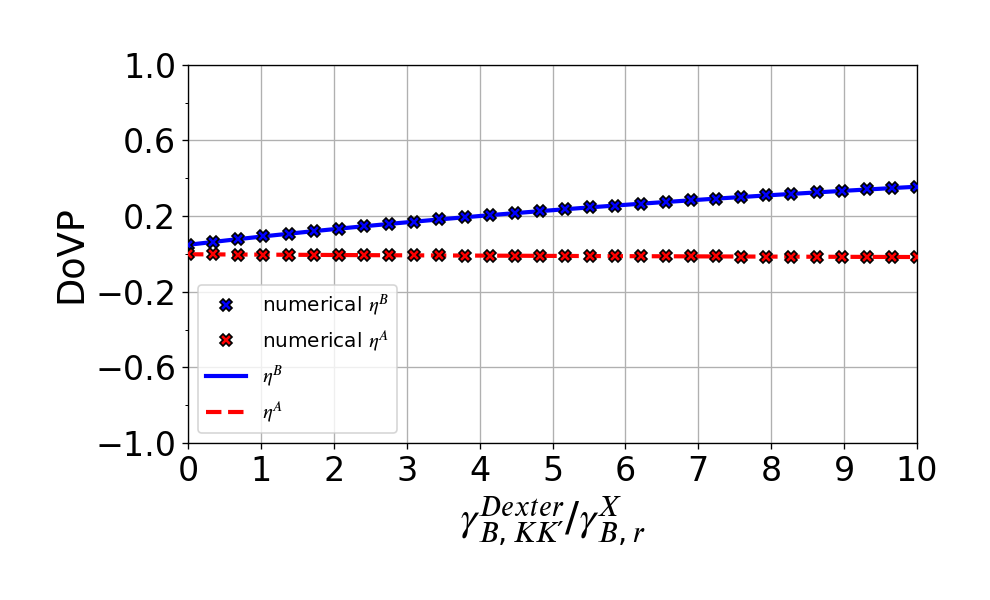

In [3]:
y_B_exmulti = 10
y_B_Demulti = 1
y_A_exmulti = 10
y_A_rmulti  = 1

y_B_r = 1

G_B_K = 1


fig, ax = plt.subplots(figsize=(8.25, 5), dpi=120)

y_B_ex = y_B_exmulti * y_B_r
# y_B_De = y_B_Demulti * y_B_r
y_A_ex = y_A_exmulti * y_B_r
y_A_r  = y_A_rmulti  * y_B_r

globals()['ADoVP'] = []
globals()['BDoVP'] = []
for y_B_De in np.linspace(0.00001, 10, 30):
    
    A = np.array([[-(y_B_ex+y_B_De+y_B_r), y_B_ex, 0, 0], 
                  [y_B_ex, -(y_B_ex+y_B_De+y_B_r), 0, 0], 
                  [0, y_B_De, -(y_A_ex+y_A_r), y_A_ex], 
                  [y_B_De, 0, y_A_ex, -(y_A_ex+y_A_r)]])
    # print('for 𝛾_{𝐵,𝐾𝐾′}^{𝐷𝑒𝑥𝑡𝑒𝑟}/𝛾_{𝐵,𝑟}^𝑋 =',y_B_De ,' the matrix A is\n',A)
    b = np.array([-G_B_K, 0, 0, 0])
    # print('and the matrix b is\n',b,'\n----------------------------')

    ans1 = np.linalg.inv(A).dot(b)
    # print("N^B_K:",ans1[0],"\nN^B_K':",ans1[1], "\nN^A_K:",ans1[2],"\nN^A_K':",ans1[3])
    DoVP_of_B = (ans1[0]-ans1[1])/(ans1[0]+ans1[1]) # print("B exciton DoVP = ",BDoVP)
    DoVP_of_A = (ans1[2]-ans1[3])/(ans1[2]+ans1[3]) # print("A exciton DoVP = ",ADoVP)
    
    globals()['BDoVP'] += [DoVP_of_B]
    globals()['ADoVP'] += [DoVP_of_A]

y_B_De = np.linspace(0.00001, 10, 30)
ax.plot( y_B_De, globals()['BDoVP'], 'bX', markeredgecolor='k', markersize=7.5, zorder=3)
ax.plot( y_B_De, globals()['ADoVP'], 'rX', markeredgecolor='k', markersize=7.5, zorder=3)

ax.plot( np.linspace(0, 10, 10000) , B_exciton_function(y_B_ex, np.linspace(0, 10, 10000), y_B_r), linestyle='solid', color='blue' ,linewidth=2.5, zorder=2)
ax.plot( np.linspace(0, 50, 10000) , A_exciton_function(y_B_ex, np.linspace(0, 50, 10000), y_B_r, y_A_ex, y_A_r), linestyle='dashed', color='red' ,linewidth=2.5, zorder=2)

size = 25
# ax.set_title('analytic result', fontsize=size)
ax.grid()
# ax.set_ylabel("$𝜂^𝐵$", fontsize=size-3, rotation=90)
# ax.set_ylabel("$𝜂^𝐴$", fontsize=size-3, rotation=90)
# ax.set_yticks(np.arange(0, 1.01, 1./5))
# ax.set_yticks(np.arange(0, 1.01, 1./10), minor=True)
# ax.set_ylim(0, 1)
# ax.set_xticks(np.arange(0, 10.01, 1))
# ax.set_xlim(0, 10)
# ax.set_yticks(np.arange(-1, 0.01, 1./5))
# ax.set_yticks(np.arange(-1, 0.01, 1./10), minor=True)
# ax.set_ylim(-1, 0)
# ax.set_xticks(np.arange(0, 10.01, 1))
# ax.set_xlim(0, 10)
ax.set_ylabel("DoVP", fontsize=size-3, rotation=90)
ax.set_yticks(np.arange(-1, 1.01, 2./5))
ax.set_yticks(np.arange(-1, 1.01, 2./10), minor=True)
ax.set_ylim(-1, 1)
ax.set_xticks(np.arange(0, 10.01, 1))
ax.set_xlim(0, 10)
ax.set_xlabel('$𝛾_{𝐵,𝐾𝐾′}^{𝐷𝑒𝑥𝑡𝑒𝑟}/𝛾_{𝐵,𝑟}^𝑋$', fontsize=size)
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend(['numerical', 'analytic'], fontsize=16, loc='lower left')
ax.legend(["numerical $𝜂^𝐵$", "numerical $𝜂^𝐴$", "$𝜂^𝐵$", "$𝜂^𝐴$"], fontsize=12, loc='lower left')
plt.tight_layout(pad=3.1)
plt.show() 



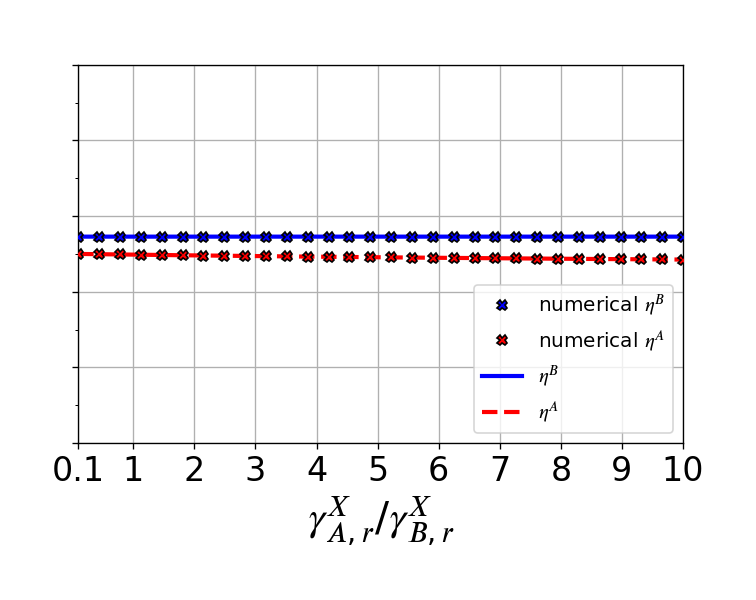

In [6]:
y_B_exmulti = 10
y_B_Demulti = 1
y_A_exmulti = 10
y_A_rmulti  = 1

y_B_r = 1

G_B_K = 1

fig, ax = plt.subplots(figsize=(6.3, 5), dpi=120)
# fig, ax = plt.subplots(figsize=(7.25, 5), dpi=120)
y_B_ex = y_B_exmulti * y_B_r
y_B_De = y_B_Demulti * y_B_r
y_A_ex = y_A_exmulti * y_B_r
# y_A_r  = y_A_rmulti  * y_B_r

globals()['ADoVP'] = []
globals()['BDoVP'] = []
for y_A_r in np.linspace(0.1, 10, 30):
    
    A = np.array([[-(y_B_ex+y_B_De+y_B_r), y_B_ex, 0, 0], 
                  [y_B_ex, -(y_B_ex+y_B_De+y_B_r), 0, 0], 
                  [0, y_B_De, -(y_A_ex+y_A_r), y_A_ex], 
                  [y_B_De, 0, y_A_ex, -(y_A_ex+y_A_r)]])
    # print('for 𝛾_{𝐴,𝑟}^𝑋/𝛾_{𝐵,𝑟}^𝑋 =', y_A_r,'\nand 𝛾_{𝐵,𝐾𝐾′}^{𝐷𝑒𝑥𝑡𝑒𝑟}/𝛾_{𝐵,𝑟}^𝑋=', y_B_De,'\nthe matrix A is\n',A)
    b = np.array([-1, 0, 0, 0])
    # print('and the matrix b is\n',b,'\n----------------------------')

    ans1 = np.linalg.inv(A).dot(b)
    # print("N^B_K:",ans1[0],"\nN^B_K':",ans1[1], "\nN^A_K:",ans1[2],"\nN^A_K':",ans1[3])
    DoVP_of_B = (ans1[0]-ans1[1])/(ans1[0]+ans1[1]) # print("B exciton DoVP = ",BDoVP)
    DoVP_of_A = (ans1[2]-ans1[3])/(ans1[2]+ans1[3]) # print("A exciton DoVP = ",ADoVP)
    
    globals()['BDoVP'] += [DoVP_of_B]
    globals()['ADoVP'] += [DoVP_of_A]

y_A_r = np.linspace(0.1, 10, 30)
ax.plot( y_A_r, globals()['BDoVP'], 'bX', markeredgecolor='k', markersize=6, zorder=3)
ax.plot( y_A_r, globals()['ADoVP'], 'rX', markeredgecolor='k', markersize=6, zorder=3)

ax.plot( np.linspace(0.1, 10, 10000) , B_exciton_function(y_B_ex, y_B_De , y_B_r)*(1+0*np.linspace(0.1, 10, 10000)), linestyle='solid', color='blue' ,linewidth=2.5, zorder=2)
ax.plot( np.linspace(0.1, 10, 10000) , A_exciton_function(y_B_ex, y_B_De, y_B_r, y_A_ex, np.linspace(0.1, 10, 10000)), linestyle='dashed', color='red' ,linewidth=2.5, zorder=2)

# ax.set_title('$𝛾_{𝐵,𝐾𝐾′}^{𝐷𝑒𝑥𝑡𝑒𝑟}=5 𝛾_{𝐵,𝑟}^𝑋$', fontsize=30)
ax.grid()
# ax.set_ylabel("$𝜂^𝐵$", fontsize=size-3, rotation=90)
# ax.set_ylabel("$𝜂^𝐴$", fontsize=size-3, rotation=90)
# ax.set_yticks(np.arange(0, 1.01, 1./5))
# ax.set_yticks(np.arange(0, 1.01, 1./10), minor=True)
# ax.set_ylim(0, 1)
# ax.set_xticks(np.arange(0, 10.01, 1))
# ax.set_xlim(0, 10)
# ax.set_yticks(np.arange(-1, 0.01, 1./5))
# ax.set_yticks(np.arange(-1, 0.01, 1./10), minor=True)
# ax.set_ylim(-1, 0)
# ax.set_xticks(np.arange(0, 10.01, 1))
# ax.set_xlim(0, 10)
# ax.set_ylabel("DoVP", fontsize=22, rotation=90)
# ax.set_yticks(np.arange(-1, 1.01, 2./5))
ax.set_yticks(np.arange(-1, 1.01, 2./5), [' ', ' ', ' ', ' ', ' ', ' '])
ax.set_yticks(np.arange(-1, 1.01, 2./10), minor=True)
ax.set_ylim(-1, 1)
ax.set_xticks(np.append([0.1], np.linspace(1, 10, 10)), [ '0.1',  '1' ,  '2' ,  '3' ,  '4' ,  '5' ,  '6' ,  '7' ,  '8' ,  '9' , '10' ])
ax.set_xlim(0.1, 10)
ax.set_xlabel('$𝛾_{𝐴,𝑟}^𝑋/𝛾_{𝐵,𝑟}^𝑋$', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend(['numerical', 'analytic'], fontsize=16, loc='lower left')
ax.legend(["numerical $𝜂^𝐵$", "numerical $𝜂^𝐴$", "$𝜂^𝐵$", "$𝜂^𝐴$"], fontsize=12, loc='lower right')
plt.tight_layout(pad=3.1)
plt.show() 

In [115]:
def B_exciton_function(y_B_KK, y_B_De, y_B_r):
    B = 1/(1+2*y_B_KK/(y_B_De+y_B_r))
    return B

def A_exciton_function(y_B_KK, y_B_De, y_B_r, y_A_KK, y_A_r):
    A = 1/(1+2*(y_A_KK/y_A_r))*(-1)*B_exciton_function(y_B_KK, y_B_De, y_B_r)
    return A

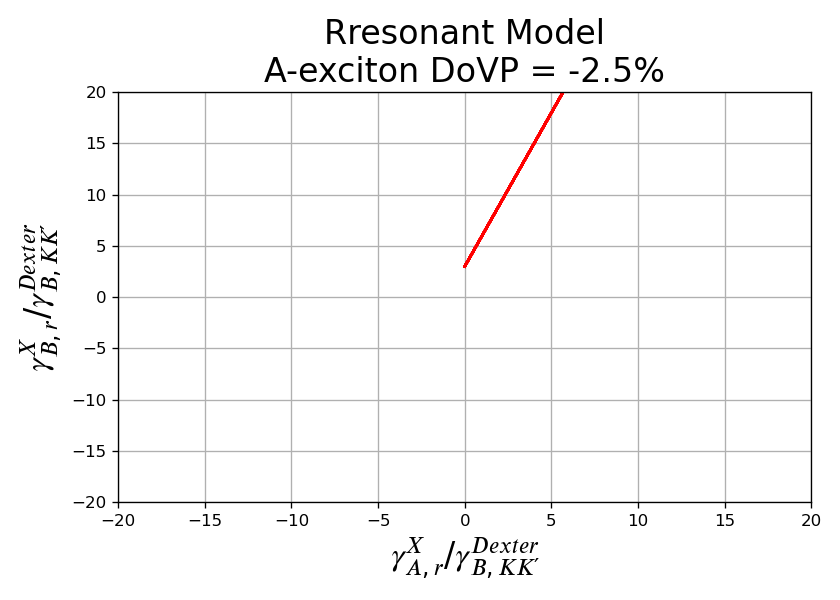

In [131]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=120)

y_B_De = 0.1
for y_A_r in np.linspace(0, 10, 30):
    ax.plot(np.linspace(0, 10, 30)/y_B_De, (np.linspace(0.00001, 10, 30)/y_B_De+1)*3, 'r')

ax.set_title('Non-resonant Model\nA-exciton DoVP = -2.5%', fontsize=20)
ax.grid()
ax.set_xlabel('$𝛾_{𝐴,𝑟}^𝑋/𝛾_{𝐵,𝐾𝐾′}^{𝐷𝑒𝑥𝑡𝑒𝑟}$', fontsize=20)
ax.set_ylabel('$𝛾_{𝐵,𝑟}^𝑋/𝛾_{𝐵,𝐾𝐾′}^{𝐷𝑒𝑥𝑡𝑒𝑟}$', fontsize=20)
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
plt.tight_layout()
plt.show()

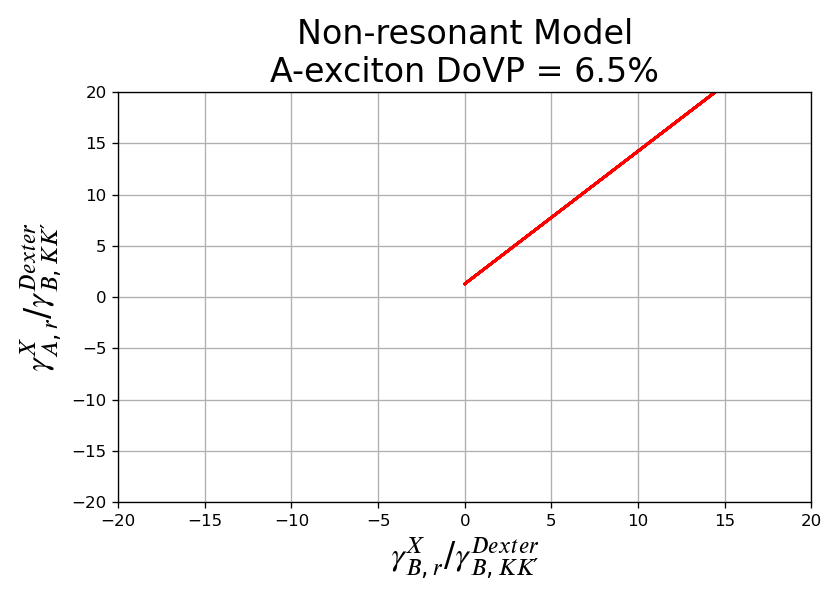

In [132]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=120)

y_B_De = 0.1
for y_B_r in np.linspace(0, 10, 30):
    ax.plot(np.linspace(0, 10, 30)/y_B_De, (np.linspace(0.00001, 10, 30)/y_B_De+1)*1.29528536, 'r')

ax.set_title('Non-resonant Model\nA-exciton DoVP = 6.5%', fontsize=20)
ax.grid()
ax.set_xlabel('$𝛾_{𝐵,𝑟}^𝑋/𝛾_{𝐵,𝐾𝐾′}^{𝐷𝑒𝑥𝑡𝑒𝑟}$', fontsize=20)
ax.set_ylabel('$𝛾_{𝐴,𝑟}^𝑋/𝛾_{𝐵,𝐾𝐾′}^{𝐷𝑒𝑥𝑡𝑒𝑟}$', fontsize=20)
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
plt.tight_layout()
plt.show()  

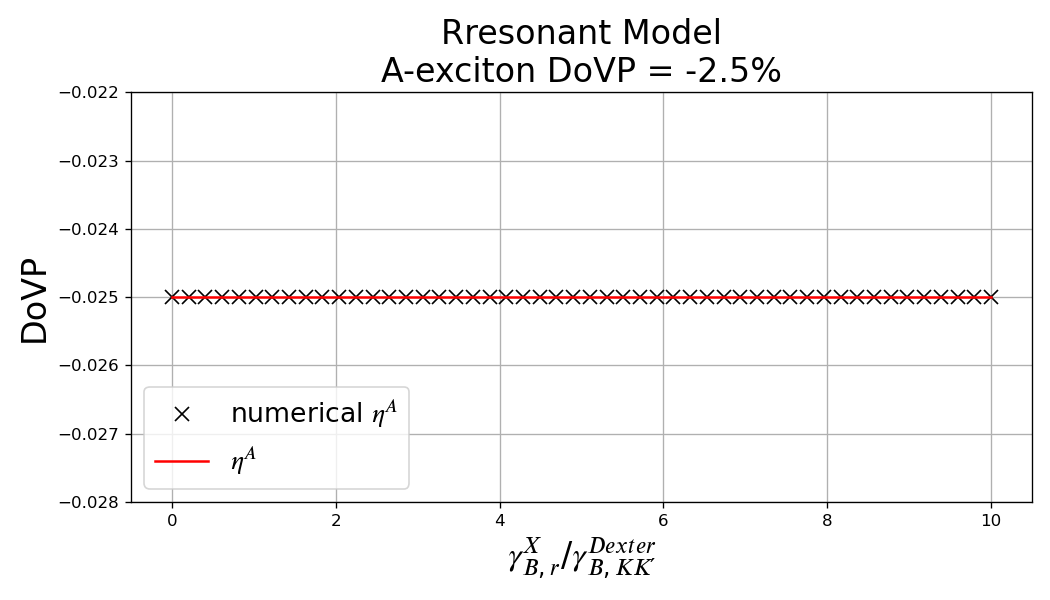

In [143]:
#創建畫布
fig, ax = plt.subplots(figsize=(8.75, 5), dpi=120)

G_B_K = 1
G_B_Kprime = 0
y_B_De = 5

globals()['A_DoVP'] = []
globals()['A_DoVP_analytic'] = []
for y_B_r in np.linspace(0.001, 10, 50) * y_B_De:
    y_A_r  = (y_B_r/y_B_De+1)*3*y_B_De
    y_B_KK = 1.5*y_A_r
    y_A_KK = 1.5*y_A_r
    
    A = np.array([[-(y_B_KK+y_B_De+y_B_r), y_B_KK, 0, 0], 
                  [y_B_KK, -(y_B_KK+y_B_De+y_B_r), 0, 0], 
                  [0, y_B_De, -(y_A_KK+y_A_r), y_A_KK], 
                  [y_B_De, 0, y_A_KK, -(y_A_KK+y_A_r)]])
    # print('for 𝛾_{𝐵,𝐾𝐾′}^{𝐷𝑒𝑥𝑡𝑒𝑟}/𝛾_{𝐵,𝑟}^𝑋 =',y_B_De ,' the matrix A is\n',A)
    b = np.array([-G_B_K, -G_B_Kprime, 0, 0])
    # print('and the matrix b is\n',b,'\n----------------------------')
    
    ans1 = np.linalg.inv(A).dot(b)
    DoVP = ((ans1[2]-ans1[3])/(ans1[2]+ans1[3]))
    # print(A_DoVP)
    #數值解
    globals()['A_DoVP'] += [DoVP]

    #解析解
    globals()['A_DoVP_analytic'] += [A_exciton_function(y_B_KK, y_B_De, y_B_r, y_A_KK, y_A_r)]


#繪製數值解
ax.plot( np.linspace(0.001, 10, 50), globals()['A_DoVP'], 'kx', markersize=8 , zorder=2)   
#繪製解析解
ax.plot( np.linspace(0.001, 10, 50), globals()['A_DoVP_analytic'], 'r', zorder=2)
ax.legend(['numerical $𝜂^𝐴$','$𝜂^𝐴$'], fontsize=16, loc='lower left')

ax.set_title('Rresonant Model\nA-exciton DoVP = -2.5%', fontsize=20)
ax.set_xlabel('$𝛾_{𝐵,𝑟}^𝑋/𝛾_{𝐵,𝐾𝐾′}^{𝐷𝑒𝑥𝑡𝑒𝑟}$', fontsize=20)
ax.set_ylabel('DoVP', fontsize=20)
ax.grid()
ax.set_ylim(-0.028, -0.022)
plt.tight_layout()
plt.show()

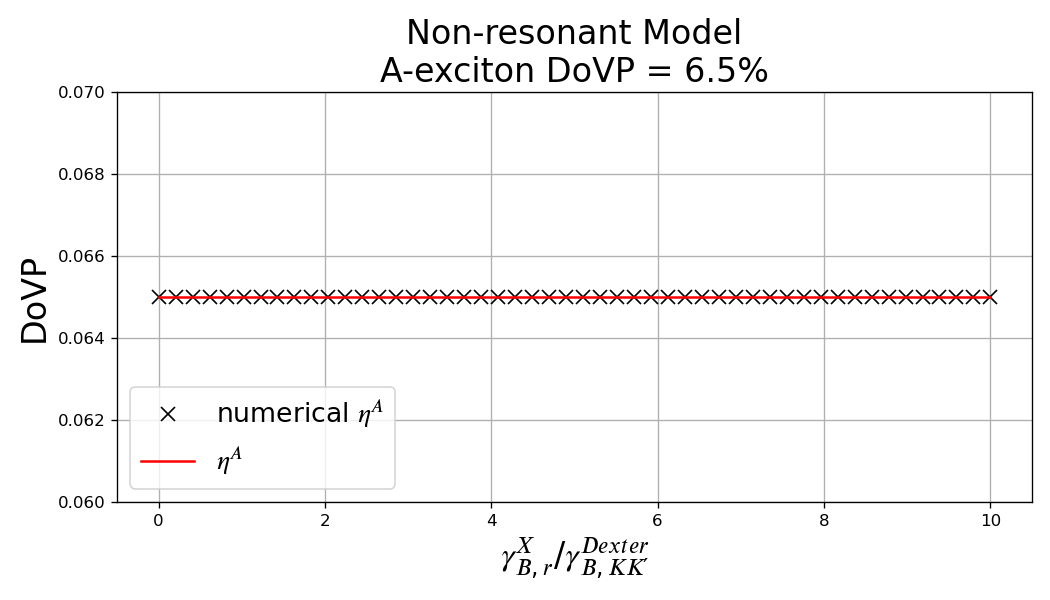

In [144]:
#創建畫布
fig, ax = plt.subplots(figsize=(8.75, 5), dpi=120)

G_B_K = 1
G_B_Kprime = 0
y_B_De = 5

globals()['A_DoVP'] = []
globals()['A_DoVP_analytic'] = []
for y_B_r in np.linspace(0.001, 10, 50)*y_B_De :
    y_A_r  = (y_B_r/y_B_De+1)*(-1.29528536) * y_B_De
    y_B_KK = 31/18*y_A_r
    y_A_KK = 31/18*y_A_r
    
    A = np.array([[-(y_B_KK+y_B_De+y_B_r), y_B_KK, 0, 0], 
                  [y_B_KK, -(y_B_KK+y_B_De+y_B_r), 0, 0], 
                  [0, y_B_De, -(y_A_KK+y_A_r), y_A_KK], 
                  [y_B_De, 0, y_A_KK, -(y_A_KK+y_A_r)]])
    # print('for 𝛾_{𝐵,𝐾𝐾′}^{𝐷𝑒𝑥𝑡𝑒𝑟}/𝛾_{𝐵,𝑟}^𝑋 =',y_B_De ,' the matrix A is\n',A)
    b = np.array([-G_B_K, -G_B_Kprime, 0, 0])
    # print('and the matrix b is\n',b,'\n----------------------------')
    
    ans1 = np.linalg.inv(A).dot(b)
    DoVP = ((ans1[2]-ans1[3])/(ans1[2]+ans1[3]))
    # print(A_DoVP)
    #數值解
    globals()['A_DoVP'] += [DoVP]

    #解析解
    globals()['A_DoVP_analytic'] += [A_exciton_function(y_B_KK, y_B_De, y_B_r, y_A_KK, y_A_r)]
    
#繪製數值解
ax.plot( np.linspace(0.001, 10, 50), globals()['A_DoVP'], 'kx', markersize=8 , zorder=2)   
#繪製解析解
ax.plot( np.linspace(0.001, 10, 50), globals()['A_DoVP_analytic'], 'r', zorder=2)
ax.legend(['numerical $𝜂^𝐴$','$𝜂^𝐴$'], fontsize=16, loc='lower left')

ax.set_title('Non-resonant Model\nA-exciton DoVP = 6.5%', fontsize=20)
ax.set_xlabel('$𝛾_{𝐵,𝑟}^𝑋/𝛾_{𝐵,𝐾𝐾′}^{𝐷𝑒𝑥𝑡𝑒𝑟}$', fontsize=20)
ax.set_ylabel('DoVP', fontsize=20)
ax.grid()
ax.set_ylim(0.06, 0.07)
plt.tight_layout()
plt.show()

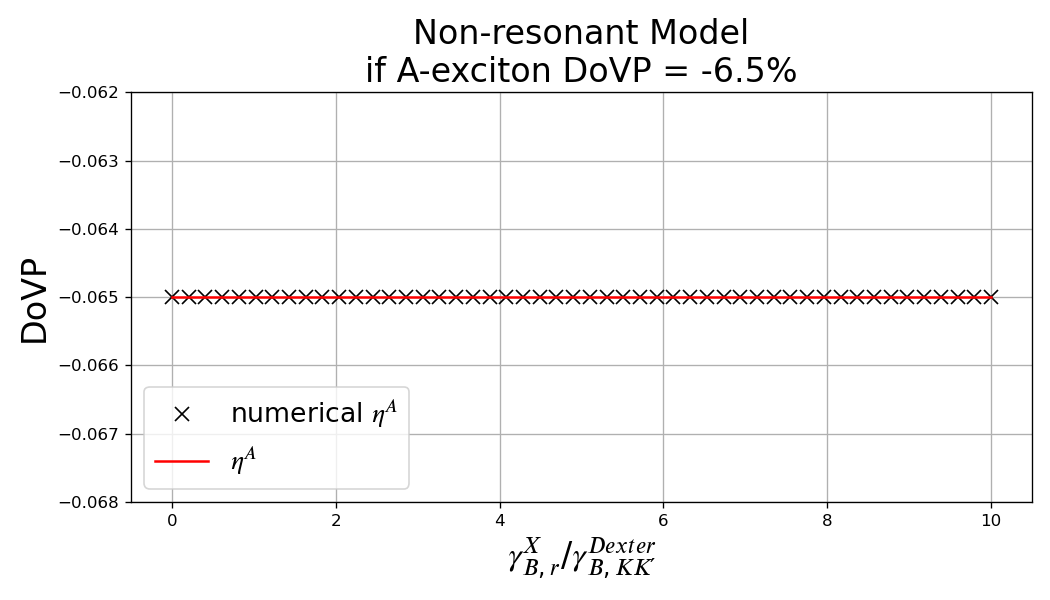

In [145]:
#創建畫布
fig, ax = plt.subplots(figsize=(8.75, 5), dpi=120)

G_B_K = 1
G_B_Kprime = 0
y_B_De = 5

globals()['A_DoVP'] = []
globals()['A_DoVP_analytic'] = []
for y_B_r in np.linspace(0.001, 10, 50)*y_B_De :
    y_A_r  = (y_B_r/y_B_De+1)*(0.7146401985) * y_B_De
    y_B_KK = 31/18*y_A_r
    y_A_KK = 31/18*y_A_r
    
    A = np.array([[-(y_B_KK+y_B_De+y_B_r), y_B_KK, 0, 0], 
                  [y_B_KK, -(y_B_KK+y_B_De+y_B_r), 0, 0], 
                  [0, y_B_De, -(y_A_KK+y_A_r), y_A_KK], 
                  [y_B_De, 0, y_A_KK, -(y_A_KK+y_A_r)]])
    # print('for 𝛾_{𝐵,𝐾𝐾′}^{𝐷𝑒𝑥𝑡𝑒𝑟}/𝛾_{𝐵,𝑟}^𝑋 =',y_B_De ,' the matrix A is\n',A)
    b = np.array([-G_B_K, -G_B_Kprime, 0, 0])
    # print('and the matrix b is\n',b,'\n----------------------------')
    
    ans1 = np.linalg.inv(A).dot(b)
    DoVP = ((ans1[2]-ans1[3])/(ans1[2]+ans1[3]))
    # print(A_DoVP)
    #數值解
    globals()['A_DoVP'] += [DoVP]

    #解析解
    globals()['A_DoVP_analytic'] += [A_exciton_function(y_B_KK, y_B_De, y_B_r, y_A_KK, y_A_r)]
    
#繪製數值解
ax.plot( np.linspace(0.001, 10, 50), globals()['A_DoVP'], 'kx', markersize=8 , zorder=2)   
#繪製解析解
ax.plot( np.linspace(0.001, 10, 50), globals()['A_DoVP_analytic'], 'r', zorder=2)
ax.legend(['numerical $𝜂^𝐴$','$𝜂^𝐴$'], fontsize=16, loc='lower left')

ax.set_title('Non-resonant Model\nif A-exciton DoVP = -6.5%', fontsize=20)
ax.set_xlabel('$𝛾_{𝐵,𝑟}^𝑋/𝛾_{𝐵,𝐾𝐾′}^{𝐷𝑒𝑥𝑡𝑒𝑟}$', fontsize=20)
ax.set_ylabel('DoVP', fontsize=20)
ax.grid()
ax.set_ylim(-0.068, -0.062)
plt.tight_layout()
plt.show()